## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. 

**Primary Objective** : 
* Our motive here is to correctly predict the fraudulent transactions than the non-fraudulent ones as fraudulent transactions can be very costly for the bank. So, we are looking for a higher recall value. 
* F1-score can also be a good metric in this case as it accounts for a balance between recall and precision.

In [1037]:
# importing important libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

## Exploratory data analysis

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Let's look at the shape
df.shape

(284807, 31)

In [ ]:
# Let's look at the column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

So, there are no missing values.

In [ ]:
# Let's have a look at the stats summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


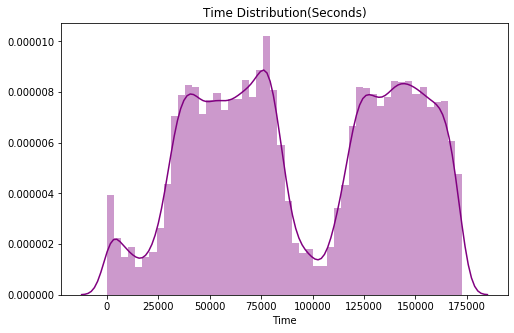

In [6]:
#observe the different feature type present in the data
#Let's look at the distribution of Time variable
plt.figure(figsize=(8,5))
plt.title('Time Distribution(Seconds)')
sns.distplot(df['Time'], color='purple')

So we can see that most of the transactions have happened during daytime.

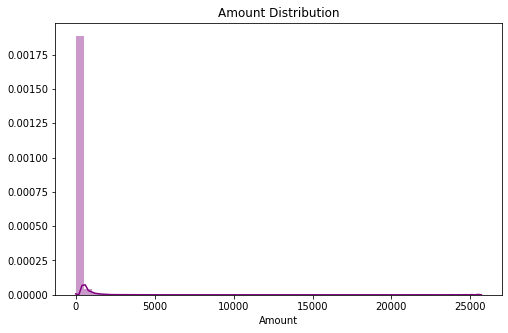

In [7]:
#observe the different feature type present in the data
#Let's look at the distribution of Time variable
plt.figure(figsize=(8,5))
plt.title('Amount Distribution')
sns.distplot(df['Amount'], color='purple')

Majority of the transactions amount is very low and it looks skewed too.

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(classes)
print(f'Normal transactions: {normal_share}')
print(f'Fraudulent transactions: {fraud_share}')

0    284315
1       492
Name: Class, dtype: int64
Normal transactions: 99.82725143693798
Fraudulent transactions: 0.1727485630620034


This is a highly imbalanced dataset as the class=1 i.e. fraudulent transactions account for just 0.172% of the dataset.

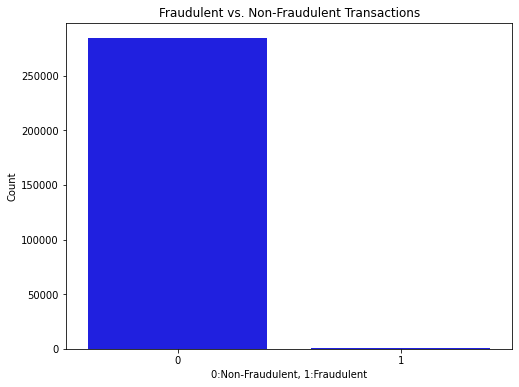

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(8,6))
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent');

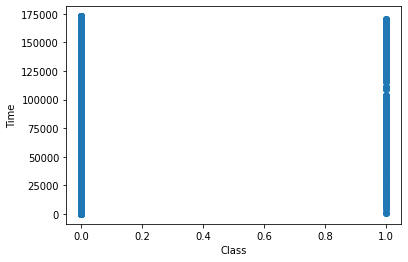

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
#sns.scatterplot(x=df['Class'],y=df['Time'])
plt.scatter(df['Class'], df['Time'])
plt.xlabel('Class')
plt.ylabel('Time')
plt.show()

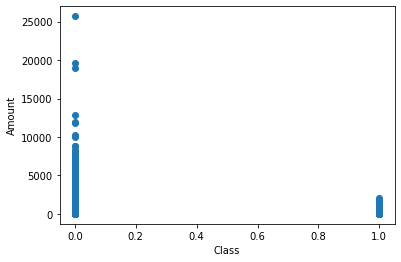

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df['Class'], df['Amount'])
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

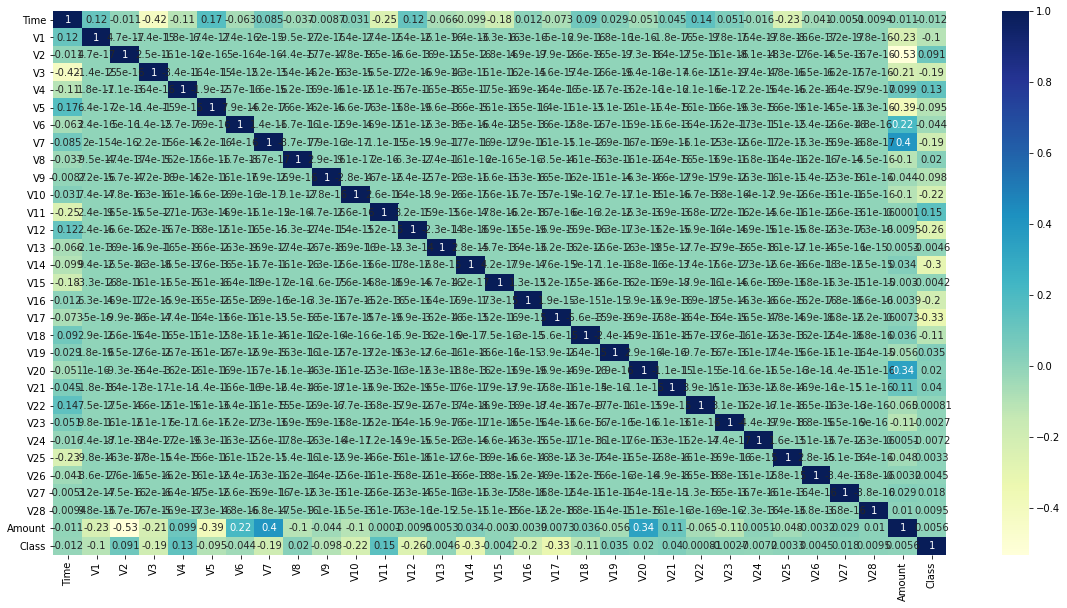

In [ ]:
# Let's plot a heatmap and check correlation
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Inference from the above graph
**Some positively correlated variables**
* Amount and V7
* Amount and V20

**Some negatively correlated variables**
* Amount and V2
* Class and V17

But, none of the variables are strongly correlated.

In [4]:
# Drop unnecessary columns. Time does not add much value to the class variable, so we can go ahead and drop that column.
df = df.drop(columns=['Time'])

### Plotting the distribution of a variable

In [5]:
# Getting numeric columns
num_cols = list(df.select_dtypes([np.number]).columns)
num_cols.remove('Class')

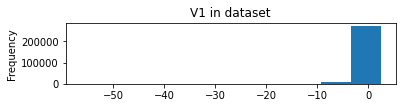

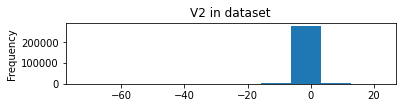

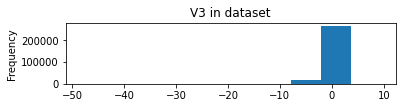

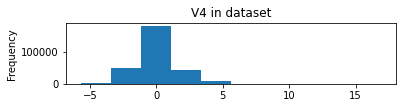

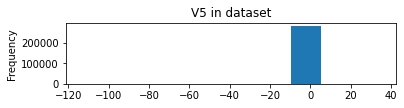

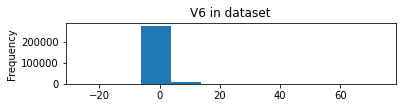

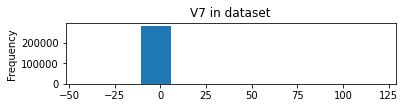

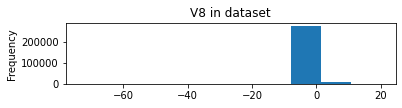

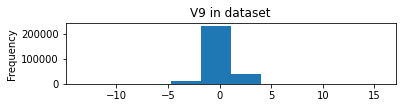

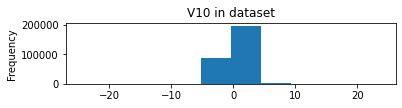

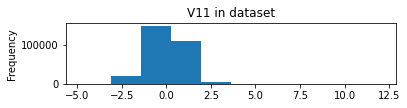

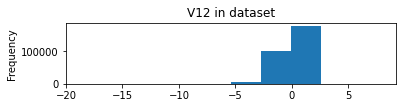

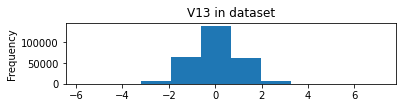

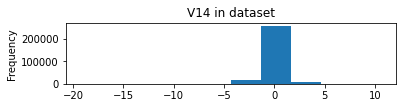

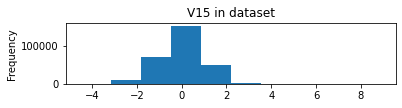

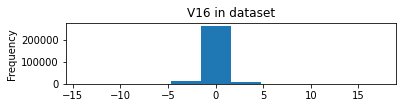

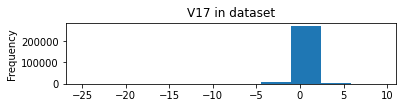

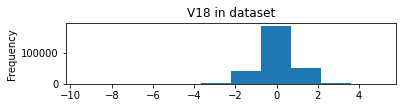

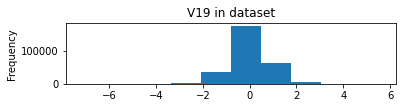

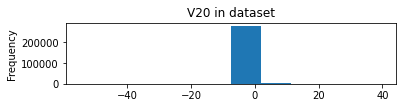

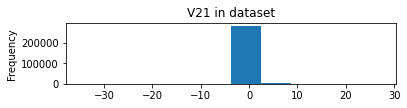

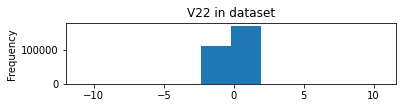

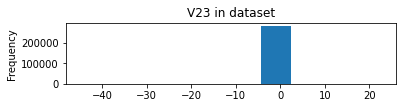

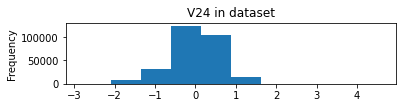

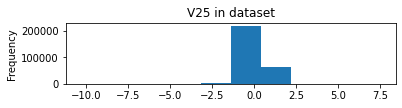

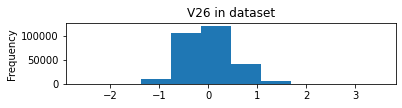

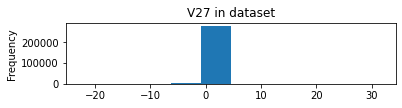

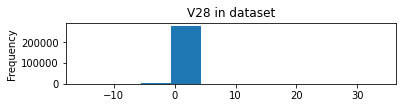

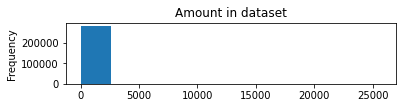

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
pos1=1
for col in num_cols:
    plt.figure(figsize=(13,20))
    plt.subplot(15,2,pos1)
    df[col].plot.hist(title='{} in dataset'.format(col))
    pos1+=1
    plt.show()

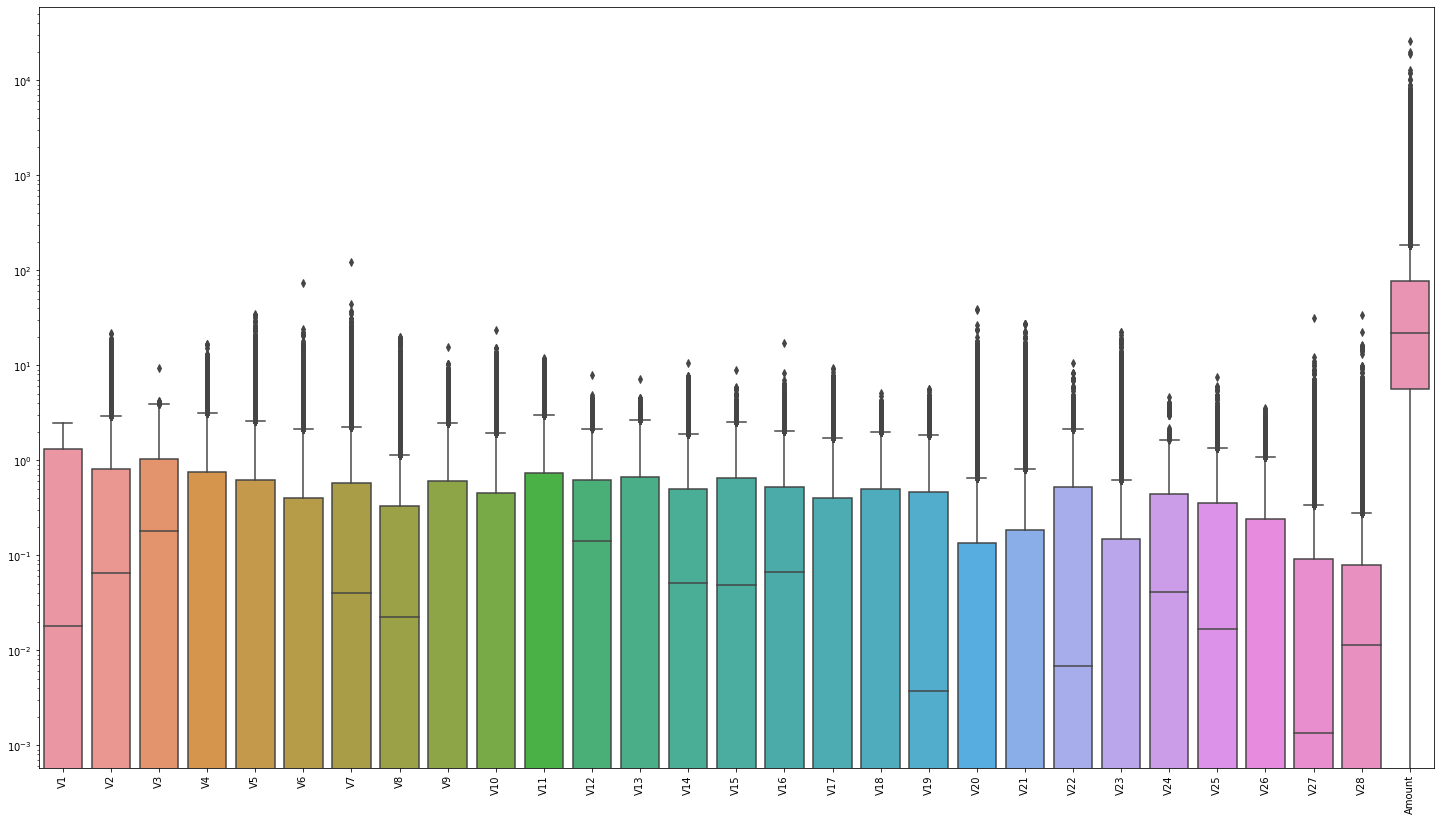

In [ ]:
#Let's visualise using boxplots as well

plt.figure(figsize=(25,14))
sns.boxplot(data=df.loc[:,num_cols])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.autoscale('True')
plt.show()

As we can see there is skewness in the data, so let's split the data first into train and test and apply power transformation on the variables.

### Splitting the data into train & test data

In [6]:
X = df.drop('Class', axis=1)
y = df['Class']

In [7]:
# StratifiedSHuffleSplit to split the data into Train and test dataset
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

TRAIN: [ 36001  12844   2873 ... 269968 175960  47973] TEST: [159949  15295 260353 ... 211932  70523  97767]
TRAIN: [ 46703  37864  53704 ... 195186 261438  51416] TEST: [121014  92252 260341 ... 181799  82326 224004]
TRAIN: [167230 199227 240655 ... 226803 125192  34695] TEST: [ 77137 250389 162020 ...  29774 146893 221549]
TRAIN: [  8038  60161 193863 ... 217105 207595   5194] TEST: [ 70283 106113  44216 ...  27576 145659 248227]
TRAIN: [ 73271  12342  27439 ...  85256 253556 274487] TEST: [229938  58436 277040 ...  62592 245003 107389]


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [8]:
# Count of class=1 acroos datasets
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [9]:
# Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()
pt.fit(X_train)
X_train_pt = pd.DataFrame(pt.transform(X_train), columns = list(X_train.columns))
X_test_pt = pd.DataFrame(pt.transform(X_test), columns = list(X_test.columns))

(<matplotlib.axes._subplots.AxesSubplot at 0x1d64e6fc588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d64e6fc588>)

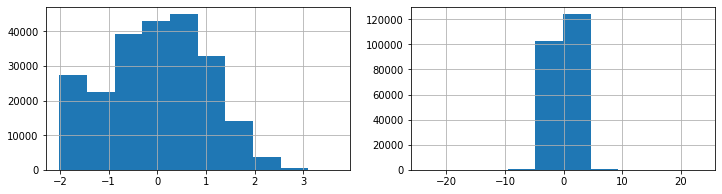

In [14]:
# plot the histogram of a variable from the dataset again to see the result

plt.figure (figsize=(12,3))
plt.subplot(1, 2, 1), X_train_pt['Amount'].hist()
plt.subplot(1, 2, 2), X_train_pt['V2'].hist()

Clearly the variables have a gaussian like distribution and are centered around zero as well.

## Model Building
- Build different models on the imbalanced dataset and see the result

#### Model 1 : Logistic Regression with default parameters

In [443]:
# perform StratifiedKFold cross validation to generate the X_train_cv, y_train_cv, X_test_cv and y_test_cv which will also be used 
# later to evaluate model performance
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(X_train_pt, y_train):
    X_train_cv, X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

In [1050]:
# Defining a function to evaluate the model

def evaluate_metric(test, pred):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    print("Confusion Matrix: ")
    confusion_matrix = confusion_matrix(test, pred)
    print(confusion_matrix)
    print('\n')
    print("Classification Report: ")
    print(classification_report(test, pred))
    print("ROC AUC score:", metrics.roc_auc_score(test, pred))

In [1051]:
# Let's build a model and check its performance
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# fitting the model on X_train_cv and y_train_cv
logreg.fit(X_train_cv, y_train_cv)

# Make predictions
y_pred = logreg.predict(X_test_cv)

# evaluate the model
evaluate_metric(y_test_cv, y_pred)

Confusion Matrix: 
[[45484     6]
 [   21    58]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.91      0.73      0.81        79

    accuracy                           1.00     45569
   macro avg       0.95      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.8670226590348136


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

#### Model 3: Tuning Logistic Regression

In [209]:
# Tuning Logistic Regression to find out optimum hyper parameters

logreg3 = LogisticRegression()

penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(X_train_pt, y_train):
    X_train_cv, X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    modl = RandomizedSearchCV(logreg3, param_grid, cv = kf, scoring='roc_auc', random_state=42)
    modl.fit(X_train_cv, y_train_cv)
    print("{} fold".format(i))
    print (modl.best_params_)
    pred=modl.predict(X_test_cv)
    print('ROC_AUC_SCORE',metrics.roc_auc_score(y_test_cv,pred))
    i += 1

1 fold
{'penalty': 'l2', 'C': 1.0}
ROC_AUC_SCORE 0.8652856947189893
2 fold
{'penalty': 'l2', 'C': 1.0}
ROC_AUC_SCORE 0.7720639673206797
3 fold
{'penalty': 'l2', 'C': 1.0}
ROC_AUC_SCORE 0.8164007390690957
4 fold
{'penalty': 'l2', 'C': 1.0}
ROC_AUC_SCORE 0.8037205283676201
5 fold
{'penalty': 'l2', 'C': 1.0}
ROC_AUC_SCORE 0.8670226590348136


The best roc_auc_score is obtained for parameters {'penalty': 'l2', 'C': 1.0}.Let's go ahead and build a model with the new optimum hyper parameters.

In [344]:
# Build a new model with the optimum hyperparameters
logreg_opt1 = LogisticRegression(C=1, penalty='l2', solver='lbfgs')

# Fit the model
logreg_opt1.fit(X_train_cv, y_train_cv)

# Make predictions
y_pred_opt1 = logreg_opt1.predict(X_test_cv)

In [349]:
#print the evaluation result by choosing a evaluation metric
# call the function to print evaluation results
evaluate_metric(y_test_cv, y_pred_opt1)

Confusion Matrix: 
[[45484     6]
 [   21    58]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.91      0.73      0.81        79

    accuracy                           1.00     45569
   macro avg       0.95      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.8670226590348136
0.8670226590348136


So the values look pretty good. Let's check few other models also.

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Model 4: Decision Tree with default parameters

In [35]:
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier(max_depth=5)

In [36]:
# Making predictions
y_pred_default = dt_default.predict(X_test_cv)

In [37]:
# Let's check the evaluation metrics of our default model
evaluate_metric(y_test_cv, y_pred_default)

Confusion Matrix: 
[[45484     6]
 [   17    62]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.91      0.78      0.84        79

    accuracy                           1.00     45569
   macro avg       0.96      0.89      0.92     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.8923391147310161


Scores look good. Let's see if we can tune hyper parameters and achieve any better results.

#### Model 5: Let's tune the hyper-parameters for Decision Tree

In [214]:
# Tuning DecisionTree to get optimum hyper parameter values
dtc1 = DecisionTreeClassifier()
param_grid = {
    'min_samples_leaf': range(10, 50, 10),
    'min_samples_split': range(10, 100, 20),
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 8, 10]
}
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(X_train_pt, y_train):
    X_train_cv, X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    dtc_modl = RandomizedSearchCV(dtc1, param_grid, cv = kf, scoring='roc_auc', random_state=42)
    dtc_modl.fit(X_train_cv, y_train_cv)
    print("{} fold".format(i))
    print (dtc_modl.best_params_)
    pred_dtc=dtc_modl.predict(X_test_cv)
    print('ROC_AUC_SCORE',metrics.roc_auc_score(y_test_cv,pred_dtc))
    i += 1

1 fold
{'min_samples_split': 70, 'min_samples_leaf': 30, 'max_depth': 4, 'criterion': 'entropy'}
ROC_AUC_SCORE 0.9421318333465791
2 fold
{'min_samples_split': 10, 'min_samples_leaf': 40, 'max_depth': 10, 'criterion': 'gini'}
ROC_AUC_SCORE 0.8479254029957899
3 fold
{'min_samples_split': 90, 'min_samples_leaf': 10, 'max_depth': 4, 'criterion': 'entropy'}
ROC_AUC_SCORE 0.8859330608201553
4 fold
{'min_samples_split': 70, 'min_samples_leaf': 30, 'max_depth': 4, 'criterion': 'entropy'}
ROC_AUC_SCORE 0.8543534397600252
5 fold
{'min_samples_split': 90, 'min_samples_leaf': 10, 'max_depth': 4, 'criterion': 'entropy'}
ROC_AUC_SCORE 0.9239407186445207


So, the best roc_auc_score is obtained with parameters {'min_samples_split': 70, 'min_samples_leaf': 30, 'max_depth': 4, 'criterion': 'entropy'}. This combination {'min_samples_split': 90, 'min_samples_leaf': 10, 'max_depth': 4, 'criterion': 'entropy'} has a good score too. Let's build our decision tree with the first set of parameters and check.

In [363]:
# Fitting the decision tree with first set of optimum hyperparameters.
dtc_opt1 = DecisionTreeClassifier(max_depth=4,
                                  criterion='entropy',
                                  min_samples_split=70,
                                  min_samples_leaf=30,
                                  random_state=42)
dtc_opt1.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=30,
                       min_samples_split=70, random_state=42)

In [364]:
# Making predictions
y_pred_opt2 = dtc_opt1.predict(X_test_cv)

In [365]:
# Let's check the evaluation metrics of our default model
evaluate_metric(y_test_cv, y_pred_opt2)

Confusion Matrix: 
[[45481     9]
 [   14    65]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.88      0.82      0.85        79

    accuracy                           1.00     45569
   macro avg       0.94      0.91      0.92     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.9112934822231065


We can infer that the recall and f1-score values have increased and precision has come down a bit still it is a good enough value. Got a good roc_auc score too. Let's try the second set of parameters and see if there is any improvement in the scores.

In [366]:
# Fitting the decision tree with the second set of optimum hyperparameters.
dtc_opt2 = DecisionTreeClassifier(max_depth=4,
                                  criterion='entropy',
                                  min_samples_split=90,
                                  min_samples_leaf=10,
                                  random_state=42)
dtc_opt2.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10,
                       min_samples_split=90, random_state=42)

In [367]:
# Make predictions
y_pred_opt3 = dtc_opt2.predict(X_test_cv)

In [368]:
# Let's check the evaluation metrics of our tuned model
evaluate_metric(y_test_cv, y_pred_opt3)

Confusion Matrix: 
[[45480    10]
 [   12    67]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.87      0.85      0.86        79

    accuracy                           1.00     45569
   macro avg       0.93      0.92      0.93     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.9239407186445207


So, the recall, f1-scores and roc_auc values have increased. It is a good enough model, let's build few other models and compare the performance.

#### Model 6: Random Forest with default parameters

In [444]:
# default random forests model
rfc_cls1 = RandomForestClassifier(random_state=42)
rfc_cls1.fit(X_train_cv,y_train_cv)

RandomForestClassifier(random_state=42)

In [445]:
# Making predictions
def_rfc_pred = rfc_cls1.predict(X_test_cv)

In [446]:
# Let's check the report of our default model
print(classification_report(y_test_cv,def_rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.93      0.89      0.91        79

    accuracy                           1.00     45569
   macro avg       0.97      0.94      0.95     45569
weighted avg       1.00      1.00      1.00     45569



In [1052]:
# Cheking the roc_auc_score
"{:2.2}".format(metrics.roc_auc_score(y_test_cv, def_rfc_pred))

'0.94'

In [579]:
evaluate_metric(y_test, rfc_cls1.predict(X_test_pt))

Confusion Matrix: 
[[56862     2]
 [   27    71]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.72      0.83        98

    accuracy                           1.00     56962
   macro avg       0.99      0.86      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC score: 0.862227312140388


The precision value is quite high, but recall value for class-1 is less. Let's tune it's parameters and see if there is any improvement.

#### Model 7: Tuned Random Forests Model

In [581]:
# Broad Tuning Random Forets Model to get optimum parameters
rfc_cls3 = RandomForestClassifier()
param_grid = {
    'min_samples_leaf': range(10, 50, 10),
    'min_samples_split': range(10, 100, 20),
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 8, 10],
    'n_estimators': [1,35]
}
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(X_train_pt, y_train):
    X_train_cv, X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    rfc_modl2 = RandomizedSearchCV(rfc_cls3, param_grid, cv = kf, scoring='roc_auc', random_state=42)
    rfc_modl2.fit(X_train_cv, y_train_cv)
    print("{} fold".format(i))
    print (rfc_modl2.best_params_)
    pred_rfc3=rfc_modl2.predict(X_test_cv)
    print('ROC_AUC_SCORE',metrics.roc_auc_score(y_test_cv,pred_rfc3))
    i += 1

1 fold
{'n_estimators': 35, 'min_samples_split': 30, 'min_samples_leaf': 40, 'max_depth': 10, 'criterion': 'entropy'}
ROC_AUC_SCORE 0.884527455134828
2 fold
{'n_estimators': 35, 'min_samples_split': 30, 'min_samples_leaf': 40, 'max_depth': 10, 'criterion': 'entropy'}
ROC_AUC_SCORE 0.8163237990822855
3 fold
{'n_estimators': 35, 'min_samples_split': 90, 'min_samples_leaf': 30, 'max_depth': 10, 'criterion': 'gini'}
ROC_AUC_SCORE 0.822707870139772
4 fold
{'n_estimators': 35, 'min_samples_split': 30, 'min_samples_leaf': 40, 'max_depth': 10, 'criterion': 'entropy'}
ROC_AUC_SCORE 0.8543534397600252
5 fold
{'n_estimators': 35, 'min_samples_split': 90, 'min_samples_leaf': 30, 'max_depth': 10, 'criterion': 'gini'}
ROC_AUC_SCORE 0.892328123304329


So, we can see that maximum roc_auc_score is obtained for set of parameters {'n_estimators': 35, 'min_samples_split': 90, 'min_samples_leaf': 30, 'max_depth': 10, 'criterion': 'gini'}. Let's go ahead and build a model and evaluate it.

In [679]:
# Random Forest model with best hyperparameters
# model with the best hyperparameters
rfc_opt1 = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  criterion='gini',
                                  max_features='auto',
                                  min_samples_leaf=30,
                                  min_samples_split=90,
                                  random_state=42,
                                  n_estimators=35,
                                  warm_start=True,
                                  n_jobs=-1)

In [680]:
# Fit the model
rfc_opt1.fit(X_train_cv, y_train_cv)

RandomForestClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=90,
                       n_estimators=35, n_jobs=-1, random_state=42,
                       warm_start=True)

In [681]:
# Make predictions
predictions = rfc_opt1.predict(X_test_cv)

In [682]:
# Evaluate the model
evaluate_metric(y_test_cv, predictions)

Confusion Matrix: 
[[45482     8]
 [   16    63]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.89      0.80      0.84        79

    accuracy                           1.00     45569
   macro avg       0.94      0.90      0.92     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.8986462458016924


So, the preicison has reduced a bit but at the same time, recall and f1-scores have increased which is good news. Let's see if we can further tune it.

In [210]:
# Narrow Tuning Random Forets Model
rfc_cls2 = RandomForestClassifier()
param_grid = {
    'min_samples_leaf': range(10, 40, 10),
    'n_estimators': [1,30],
    'max_depth' : [4,8]
}
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(X_train_pt, y_train):
    X_train_cv, X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    rfc_modl = RandomizedSearchCV(rfc_cls2, param_grid, cv = kf, scoring='roc_auc', random_state=42)
    rfc_modl.fit(X_train_cv, y_train_cv)
    print("{} fold".format(i))
    print (rfc_modl.best_params_)
    pred_rfc=rfc_modl.predict(X_test_cv)
    print('ROC_AUC_SCORE',metrics.roc_auc_score(y_test_cv,pred_rfc))
    i += 1

1 fold
{'n_estimators': 30, 'min_samples_leaf': 30, 'max_depth': 8}
ROC_AUC_SCORE 0.8909267203600147
2 fold
{'n_estimators': 30, 'min_samples_leaf': 20, 'max_depth': 8}
ROC_AUC_SCORE 0.8099946851582348
3 fold
{'n_estimators': 30, 'min_samples_leaf': 20, 'max_depth': 8}
ROC_AUC_SCORE 0.8353660979878732
4 fold
{'n_estimators': 30, 'min_samples_leaf': 10, 'max_depth': 8}
ROC_AUC_SCORE 0.8670336504615008
5 fold
{'n_estimators': 30, 'min_samples_leaf': 10, 'max_depth': 8}
ROC_AUC_SCORE 0.9366429121993706


So, we can see that the best roc_auc score is obtained with parameters n_estimators=30, min_samples_leaf=10 and max_depth=8. Let's perform randomised search again to get optimum values of few other parameters.

In [97]:
# Grid search to find optimum parameter value
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': range(10, 40, 10),
    'n_estimators': [1,30],
    'max_features' : ['auto', 'log2'],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rsearch = RandomizedSearchCV(rf, param_grid, cv = kf, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)

In [98]:
rsearch.fit(X_train_cv, y_train_cv)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 8],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(10, 40, 10),
                                        'n_estimators': [1, 30]},
                   random_state=42, return_train_score=True, scoring='roc_auc')

In [99]:
# printing the optimal accuracy score and hyperparameters
print("best score", rsearch.best_score_)
print(rsearch.best_estimator_)
print(rsearch.best_params_)

best score 0.9724157429519684
RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=10, n_estimators=30)
{'n_estimators': 30, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy'}


**So, these are the best parameters that we have got:**

'n_estimators': 30, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy'
Let's reduce the min_samples_split value and build a model along with the above mentioned parameters.

In [1031]:
# Random Forest model with best hyperparameters
# model with the best hyperparameters
rfc_best1 = RandomForestClassifier(bootstrap=True,
                                  max_depth=8,
                                  criterion='entropy',
                                  min_samples_leaf=10,
                                  min_samples_split=20,
                                  random_state=42,
                                  warm_start=True,
                                  n_jobs=-1)

In [1032]:
# Fit the model
rfc_best1.fit(X_train_cv, y_train_cv)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       min_samples_split=20, n_jobs=-1, random_state=42,
                       warm_start=True)

In [1033]:
# Make predictions
predictions = rfc_best1.predict(X_test_cv)

In [1034]:
# Evaluate the model
evaluate_metric(y_test_cv, predictions)

Confusion Matrix: 
[[45486     4]
 [   10    69]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.95      0.87      0.91        79

    accuracy                           1.00     45569
   macro avg       0.97      0.94      0.95     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.9366648950527449


All values have increased specially recall and f1-scores which is the motive of our project as we want to predict the frauds accurately, also maintaining an optimum balance between precision and recall and hence the f1-score should be high as well.
roc_auc_score looks good too.

#### Model 8: XGBoost Model with default parameters

In [40]:
# fit model on training data with default hyperparameters
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_cv, y_train_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
# make predictions for test data
y_pred_xg = model_xgb.predict_proba(X_test_cv)

In [43]:
# check roc_auc_score
roc = metrics.roc_auc_score(y_test_cv, y_pred_xg[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 98.05%


In [45]:
# Make predictions
y_pred_xg2 = model_xgb.predict(X_test_cv)

In [46]:
# evaluate model
evaluate_metric(y_test_cv, y_pred_xg2)

Confusion Matrix: 
[[45486     4]
 [    8    71]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.95      0.90      0.92        79

    accuracy                           1.00     45569
   macro avg       0.97      0.95      0.96     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.9493231229008461


The XGBoost default model is itself working so well. Let's tune the parameters and see if it can be improved further.

In [229]:
# Grid search to find optimum learning_rate and subsample value
# Create the parameter grid based on the results of random search 

param_grid = {
    'learning_rate': [0.2, 0.6], 
    'subsample': [0.3, 0.6, 0.9]
}

# specify model
xgb1 = XGBClassifier()

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(X_train_pt, y_train):
    X_train_cv, X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    xgb_modl = RandomizedSearchCV(xgb1, param_grid, cv = kf, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
    xgb_modl.fit(X_train_cv, y_train_cv)
    print("{} fold".format(i))
    print (xgb_modl.best_params_)
    pred_xgb=xgb_modl.predict_proba(X_test_cv)
    print('ROC_AUC_SCORE',metrics.roc_auc_score(y_test_cv,pred_xgb[:, 1]))
    print("Score:", xgb_modl.best_score_)
    i += 1

1 fold
{'subsample': 0.6, 'learning_rate': 0.2}
ROC_AUC_SCORE 0.9825133063795656
Score: 0.9773878206596077
2 fold
{'subsample': 0.9, 'learning_rate': 0.2}
ROC_AUC_SCORE 0.969147204421058
Score: 0.9846774342159256
3 fold
{'subsample': 0.6, 'learning_rate': 0.2}
ROC_AUC_SCORE 0.9811281377740552
Score: 0.9724266484370864
4 fold
{'subsample': 0.9, 'learning_rate': 0.2}
ROC_AUC_SCORE 0.9520156050432561
Score: 0.9811396682696906
5 fold
{'subsample': 0.6, 'learning_rate': 0.2}
ROC_AUC_SCORE 0.984494575243968
Score: 0.9735883432876647


The best roc_auc score is obtained for parameters {'subsample': 0.6, 'learning_rate': 0.2}, but maximum model score is obtained for subsample=0.9.

Also, learning_rate is best at 0.2. Let's narrow down the search again and check for optimum learning_rate values.

In [300]:
# Grid search to find optimum learning_rate and subsample value
# Create the parameter grid based on the results of random search 

param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4], 
    'subsample': [0.3, 0.6, 0.9],
    'max_depth': [4, 6, 8]
}

# specify model
xgb4 = XGBClassifier()

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(X_train_pt, y_train):
    X_train_cv, X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    xgb_modl4 = RandomizedSearchCV(xgb4, param_grid, cv = kf, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
    xgb_modl4.fit(X_train_cv, y_train_cv)
    print("{} fold".format(i))
    print (xgb_modl4.best_params_)
    pred_xgb4=xgb_modl4.predict_proba(X_test_cv)
    print('ROC_AUC_SCORE',metrics.roc_auc_score(y_test_cv,pred_xgb4[:, 1]))
    print("Score:", xgb_modl4.best_score_)
    i += 1

1 fold
{'subsample': 0.6, 'max_depth': 6, 'learning_rate': 0.2}
ROC_AUC_SCORE 0.9825133063795656
Score: 0.9773878206596077
2 fold
{'subsample': 0.9, 'max_depth': 8, 'learning_rate': 0.2}
ROC_AUC_SCORE 0.9626839672650269
Score: 0.9866569179079929
3 fold
{'subsample': 0.9, 'max_depth': 8, 'learning_rate': 0.1}
ROC_AUC_SCORE 0.9857759808109169
Score: 0.9741524136148081
4 fold
{'subsample': 0.9, 'max_depth': 8, 'learning_rate': 0.2}
ROC_AUC_SCORE 0.952904101889134
Score: 0.9848269203878706
5 fold
{'subsample': 0.9, 'max_depth': 8, 'learning_rate': 0.1}
ROC_AUC_SCORE 0.9896900417674215
Score: 0.9759771362488013


The best scores have been obtained from parameters 'subsample': 0.9, 'max_depth': 8, 'learning_rate': 0.1. Let's go ahead and build a model with these and check results.

#### Model 9: Tuned XGBoost model with learning_rate=0.1, subsample=0.9 and max_depth=8

In [754]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
xgb_opt1 = XGBClassifier(learning_rate=0.1,
                         subsample=0.9,
                         max_depth=8,
                         random_state=42,
                         n_jobs=-1,
                         objective = 'binary:logistic')

# fit model on training data
xgb_opt1.fit(X_train_cv, y_train_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [755]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_xg3 = xgb_opt1.predict_proba(X_test_cv)

In [756]:
# check roc_auc_score
roc1 = metrics.roc_auc_score(y_test_cv, y_pred_xg3[:, 1])
print("AUC: %.2f%%" % (roc1 * 100.0))

AUC: 98.44%


In [757]:
y_pred_xg4 = xgb_opt1.predict(X_test_cv)

In [758]:
# print classification report
print(classification_report(y_test_cv, y_pred_xg4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.95      0.89      0.92        79

    accuracy                           1.00     45569
   macro avg       0.97      0.94      0.96     45569
weighted avg       1.00      1.00      1.00     45569



We have got the highest roc_auc score=98.44% this time, also the recall and f1-scores are high too. Let's reduce the subsample to 0.8 and see if we can increase any of the scores further.

In [760]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
xgb_opt2 = XGBClassifier(learning_rate=0.1,
                         subsample=0.8,
                         max_depth=8,
                         random_state=42,
                         n_jobs=-1,
                         objective = 'binary:logistic')

# fit model on training data
xgb_opt2.fit(X_train_cv, y_train_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [761]:
# make predictions for test data
y_pred_xg5 = xgb_opt2.predict_proba(X_test_cv)

In [762]:
# check roc_auc_score
roc4 = metrics.roc_auc_score(y_test_cv, y_pred_xg5[:, 1])
print("AUC: %.2f%%" % (roc4 * 100.0))

AUC: 98.66%


In [763]:
# Make predictions
y_pred_xg6 = xgb_opt2.predict(X_test_cv)

In [764]:
# print classification report
print(classification_report(y_test_cv, y_pred_xg6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.95      0.90      0.92        79

    accuracy                           1.00     45569
   macro avg       0.97      0.95      0.96     45569
weighted avg       1.00      1.00      1.00     45569



So, there is 0.22% increase and roc_auc_score and the recall values has increased too. This looks like a very good model.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [952]:
# Let's evaluate all of our models on test dataset and see the performance.
print("Logistic Regression on Test Dataset")
print("**************************************************************************")
evaluate_metric(y_test, logreg_opt1.predict(X_test_pt))
print("**************************************************************************")
print('\n')
print("Decision Tree on Test Dataset")
print("**************************************************************************")
evaluate_metric(y_test, dtc_opt2.predict(X_test_pt))
print("**************************************************************************")
print('\n')
print("Random Forests on Test Dataset")
print("**************************************************************************")
evaluate_metric(y_test, rfc_best1.predict(X_test_pt))
print("**************************************************************************")
print('\n')
print("XGBoost on Test Dataset")
print("**************************************************************************")
roc5 = metrics.roc_auc_score(y_test, xgb_opt2.predict_proba(X_test_pt)[:, 1])
print(classification_report(y_test, xgb_opt2.predict(X_test_pt)))
print("ROC AUC score: %.2f%%" % (roc5 * 100.0))
print("**************************************************************************")

Logistic Regression on Test Dataset
**************************************************************************
Confusion Matrix: 
[[56855     9]
 [   38    60]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.61      0.72        98

    accuracy                           1.00     56962
   macro avg       0.93      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC score: 0.8060433127950111
**************************************************************************


Decision Tree on Test Dataset
**************************************************************************
Confusion Matrix: 
[[56851    13]
 [   25    73]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.74      0.79        98

    accuracy                  

The best roc_auc_score and f1-score is shown by the XGBoost model.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


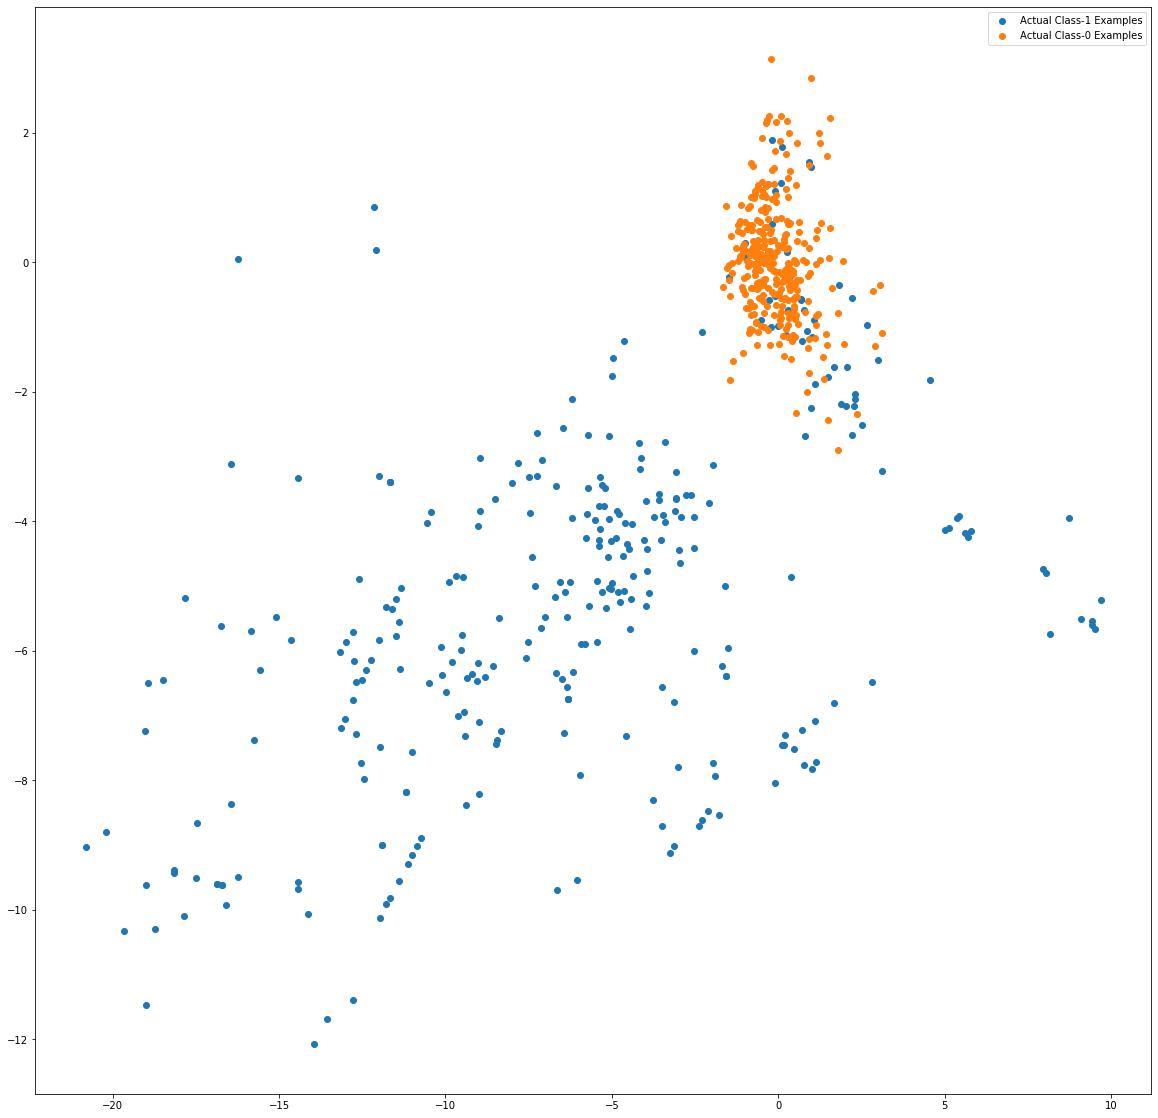

In [953]:
var_imp = []
for i in xgb_opt2.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_opt2.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_opt2.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_opt2.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_opt2.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_opt2.feature_importances_)[-2])

X_train_1 = X_train_cv.to_numpy()[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.to_numpy()[np.where(y_train_cv==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [954]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_cv, y_train_cv)

print(X_train_ros.shape[0] - X_train_cv.shape[0], 'new random picked points')

181646 new random picked points


In [955]:
# Let's check the count of classes after appyling Random Oversampling technique

print("After OverSampling, count of label '1': {}".format(sum(y_train_ros == 1))) 
print("After OverSampling, count of label '0': {}".format(sum(y_train_ros == 0)))

After OverSampling, count of label '1': 181961
After OverSampling, count of label '0': 181961


**Let's fit our models on Random over-sampled datasets**

#### Model 10: Logistic Regression after Random OverSampling

In [956]:
# Let's fit our tuned logistic regression model to the sampled dataset.
# Fit the model
logreg_opt1.fit(X_train_ros, y_train_ros)

# Make predictions
y_pred_ros1 = logreg_opt1.predict(X_test_cv)

In [957]:
# evaluate the model
evaluate_metric(y_test_cv, y_pred_ros1)

Confusion Matrix: 
[[44319  1171]
 [    5    74]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     45490
           1       0.06      0.94      0.11        79

    accuracy                           0.97     45569
   macro avg       0.53      0.96      0.55     45569
weighted avg       1.00      0.97      0.99     45569

ROC AUC score: 0.9554834697290544


The precision and f1-score for class=1 is quite low, recall and roc_auc_score is high though.

#### Model 11: Decision Tree after Random OverSampling

In [958]:
# Let's fit our tuned decision tree model on sampled dataset
dtc_opt2.fit(X_train_ros, y_train_ros)

# Make predictions
y_pred_ros2 = dtc_opt2.predict(X_test_cv)

# evaluate the model
evaluate_metric(y_test_cv, y_pred_ros2)

Confusion Matrix: 
[[43552  1938]
 [    6    73]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     45490
           1       0.04      0.92      0.07        79

    accuracy                           0.96     45569
   macro avg       0.52      0.94      0.52     45569
weighted avg       1.00      0.96      0.98     45569

ROC AUC score: 0.9407239315359337


Again, the precision and f1-scores are quite low, recall is high though.

#### Model 12: Random Forests after Random Over Sampling

In [959]:
# Let's fit our default random forests model
rfc_best1.fit(X_train_ros, y_train_ros)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       min_samples_split=20, n_jobs=-1, random_state=42,
                       warm_start=True)

In [960]:
# Making predictions
y_pred_ros3 = rfc_best1.predict(X_test_cv)

In [961]:
# evaluate the model
evaluate_metric(y_test_cv, y_pred_ros3)

Confusion Matrix: 
[[45486     4]
 [   10    69]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.95      0.87      0.91        79

    accuracy                           1.00     45569
   macro avg       0.97      0.94      0.95     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.9366648950527449


Random Forests is giving good scores compared to earlier models.

#### Model 13: XGBoost Model after Random Over Sampling

In [962]:
# Fit the model on the sampled datasets
xgb_opt2.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [963]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_ros4 = xgb_opt2.predict_proba(X_test_cv)

In [964]:
# check roc_auc_score
roc = metrics.roc_auc_score(y_test_cv, y_pred_ros4[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 99.00%


In [967]:
# evaluate model
print(classification_report(y_test_cv, xgb_opt2.predict(X_test_cv)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.90      0.90      0.90        79

    accuracy                           1.00     45569
   macro avg       0.95      0.95      0.95     45569
weighted avg       1.00      1.00      1.00     45569



We got an amazing roc_auc_score of 99% along with great scores i.e. 90 each for precision, recall and f1-score. This looks like a pretty good model.

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

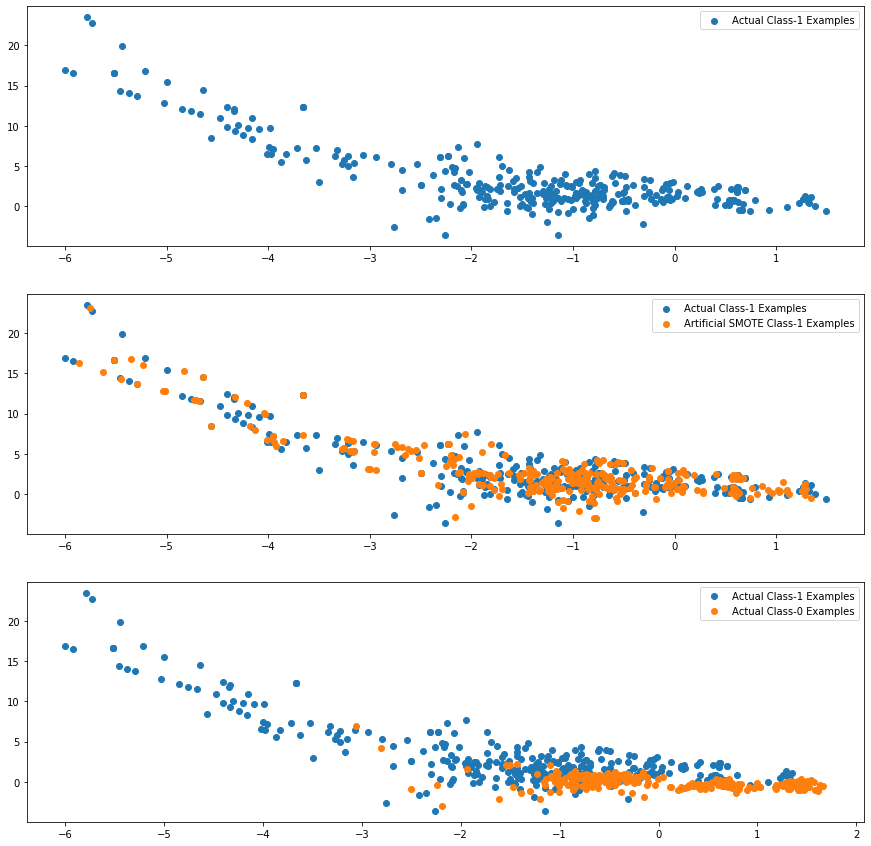

In [969]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_cv, y_train_cv)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train_cv.shape[0]:]

X_train_1 = X_train_cv.to_numpy()[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.to_numpy()[np.where(y_train_cv==0.0)]


plt.rcParams['figure.figsize'] = [15, 15]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0].values, X_train_smote_1.iloc[:X_train_1.shape[0], 1].values,
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### Model 14: Logistic Regression after SMOTE

In [971]:
# Let's fit our tuned logistic regression model to the sampled dataset.
# Fit the model
logreg_opt1.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smo1 = logreg_opt1.predict(X_test_cv)

In [972]:
# evaluate the model
evaluate_metric(y_test_cv, y_pred_smo1)

Confusion Matrix: 
[[44198  1292]
 [    5    74]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     45490
           1       0.05      0.94      0.10        79

    accuracy                           0.97     45569
   macro avg       0.53      0.95      0.54     45569
weighted avg       1.00      0.97      0.98     45569

ROC AUC score: 0.9541535070999052


As we can clearly see, the precision and f1-score values are pretty low, but the ROC AUC score and recall score is quite good.

#### Model 15: Decision Tree after SMOTE

In [973]:
# Let's fit our tuned decision tree model on sampled dataset
dtc_opt1.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smo2 = dtc_opt1.predict(X_test_cv)

In [974]:
# evaluate the model
evaluate_metric(y_test_cv, y_pred_smo2)

Confusion Matrix: 
[[42084  3406]
 [    5    74]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     45490
           1       0.02      0.94      0.04        79

    accuracy                           0.93     45569
   macro avg       0.51      0.93      0.50     45569
weighted avg       1.00      0.93      0.96     45569

ROC AUC score: 0.9309176310831981


So, even the default decision tree model is not giving us good precision and f1-scores. But the recall and roc_auc score is pretty good.

#### Model 16: Tuned Random Forests after SMOTE

In [979]:
# Let's fit our default random forests model
rfc_best1.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       min_samples_split=20, n_jobs=-1, random_state=42,
                       warm_start=True)

In [980]:
# Making predictions
y_pred_smo3 = rfc_best1.predict(X_test_cv)

In [982]:
# evaluate the model
evaluate_metric(y_test_cv, predictions)

Confusion Matrix: 
[[45482     8]
 [   10    69]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.90      0.87      0.88        79

    accuracy                           1.00     45569
   macro avg       0.95      0.94      0.94     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.9366209293459961


The scores are good and are pretty similar to the unbalanced dataset scores.

#### Model 17: XGBoost Model after SMOTE

In [983]:
# Let's fit the default XGBost model to SMOTE balanced datasets.
xgb_opt2.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [984]:
# make predictions for test data
y_pred_smo4 = xgb_opt2.predict_proba(X_test_cv)

In [985]:
# check roc_auc_score
roc = metrics.roc_auc_score(y_test_cv, y_pred_smo4[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 98.42%


In [986]:
# evaluate model
evaluate_metric(y_test_cv, xgb_opt2.predict(X_test_cv))

Confusion Matrix: 
[[45455    35]
 [    7    72]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.67      0.91      0.77        79

    accuracy                           1.00     45569
   macro avg       0.84      0.96      0.89     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.9553115025975941


The XGBoost model is giving good results.

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

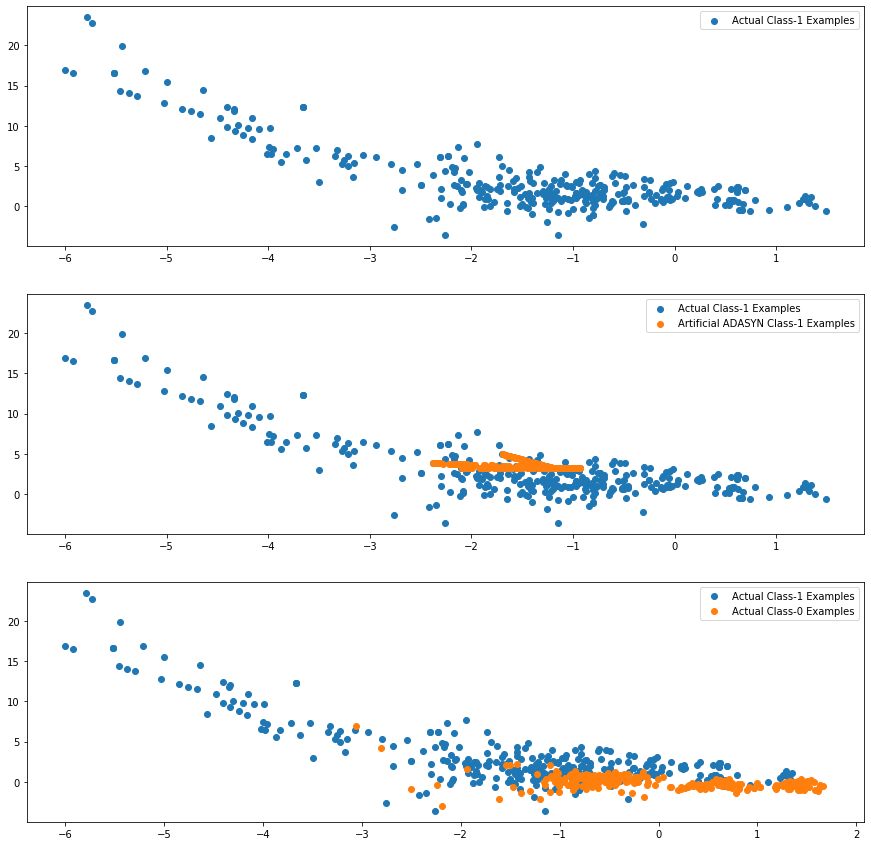

In [987]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_cv, y_train_cv)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train_cv.shape[0]:]

X_train_1 = X_train_cv.to_numpy()[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.to_numpy()[np.where(y_train_cv==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0],0].values, X_train_adasyn_1.iloc[:X_train_1.shape[0],1].values,
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### Model 18: Logistic Regression after ADASYN

In [988]:
# Let's fit our tuned logistic regression model to the sampled dataset.
logreg_opt1.fit(X_train_adasyn, y_train_adasyn)

# Make predictions
y_pred_ads1 = logreg_opt1.predict(X_test_cv)

In [989]:
# evaluate model
evaluate_metric(y_test_cv, y_pred_ads1)

Confusion Matrix: 
[[41828  3662]
 [    4    75]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     45490
           1       0.02      0.95      0.04        79

    accuracy                           0.92     45569
   macro avg       0.51      0.93      0.50     45569
weighted avg       1.00      0.92      0.96     45569

ROC AUC score: 0.9344329397753297


The precision and f1-scores are very bad. Recall for class=1 is high.

##### Build models on other algorithms to see the better performing on ADASYN

#### Model 19: Decision Tree after ADASYN

In [990]:
# Let's fit our tuned decision tree model on sampled dataset
dtc_opt1.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_ads2 = dtc_opt1.predict(X_test_cv)

In [991]:
# evaluate the model
evaluate_metric(y_test_cv, y_pred_ads2)

Confusion Matrix: 
[[42084  3406]
 [    5    74]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     45490
           1       0.02      0.94      0.04        79

    accuracy                           0.93     45569
   macro avg       0.51      0.93      0.50     45569
weighted avg       1.00      0.93      0.96     45569

ROC AUC score: 0.9309176310831981


Again, precision and f1-scores are very poor. Recall is good though.

#### Model 20: Random Forests after ADASYN

In [992]:
# Let's fit our default random forests model
rfc_best1.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_ads3 = rfc_best1.predict(X_test_cv)

In [993]:
# Evaluate the model
evaluate_metric(y_test_cv, y_pred_ads3)

Confusion Matrix: 
[[45486     4]
 [   10    69]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.95      0.87      0.91        79

    accuracy                           1.00     45569
   macro avg       0.97      0.94      0.95     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.9366648950527449


All the scores are pretty great similar to the ones obtained for RF earlier.

#### Model 21: XGBoost after ADASYN

In [994]:
# Let's fit the default XGBoost model to SMOTE balanced datasets.
xgb_opt2.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [995]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_ads4 = xgb_opt2.predict_proba(X_test_cv)

In [996]:
# check roc_auc_score
roc = metrics.roc_auc_score(y_test_cv, y_pred_ads4[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 98.44%


In [997]:
# evaluate model
evaluate_metric(y_test_cv, xgb_opt2.predict(X_test_cv))

Confusion Matrix: 
[[45458    32]
 [    9    70]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.69      0.89      0.77        79

    accuracy                           1.00     45569
   macro avg       0.84      0.94      0.89     45569
weighted avg       1.00      1.00      1.00     45569

ROC AUC score: 0.9426862490295543


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

* XGBoost on Random over-sampled dataset has given the best scores.
* Random Forests and XGBoost models seem to be performing better compared to other models on sampled datasets.
* Random Forests has given almost similar and good scores consistently with Random Over-sampling and ADASYN.
* XGBoost works better after applying Random Oversampling technique.

Let's see the evaluaion score of XGBoost model on Random over-sampled datasets.

In [998]:
# perform the best oversampling method on X_train & y_train
# Fit the model on random over-sampled dataset
xgb_opt2.fit(X_train_ros, y_train_ros )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1001]:
# Let's evaluate the model on the test data as well.
print("ROC AUC score:", metrics.roc_auc_score(y_test, xgb_opt2.predict_proba(X_test_pt)[:, 1]))
print(classification_report(y_test, xgb_opt2.predict(X_test_pt)))

ROC AUC score: 0.9730445287287678
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



As we can see, we have got better scores on test dataset with XGBoost model trained on sampled dataset than on unbalanced dataset.

Let's go ahead and evaluate the perfromance of both Random Forests and XGBoost models on test dataset after fitting those to the sampled datset that worked best for them.

In [1003]:
# Random Forests
# Random Over Sampling
rfc_best1.fit(X_train_ros, y_train_ros)
print("Results on Test Dataset of Random Forests(Random Over-Sampling)")
evaluate_metric(y_test, rfc_best1.predict(X_test_pt))
print('*****************************************************************')

#ADASYN
rfc_best1.fit(X_train_adasyn, y_train_adasyn)
print("Results on Test Dataset of Random Forests(ADASYN)")
evaluate_metric(y_test, rfc_best1.predict(X_test_pt))

Results on Test Dataset of Random Forests(Random Over-Sampling)
Confusion Matrix: 
[[56857     7]
 [   29    69]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.70      0.79        98

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC score: 0.8519792659607456
*****************************************************************
Results on Test Dataset of Random Forests(ADASYN)
Confusion Matrix: 
[[56857     7]
 [   29    69]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.70      0.79        98

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.90     56962
weighted avg       1.00      1.00  

The results are exact same and also same as the scores obtained on imbalanced dataset.

In [1006]:
# XGBoost
# Random Over Sampling
xgb_opt2.fit(X_train_ros, y_train_ros)
print("Results on Test Dataset of XGBoost(Random Over-Sampling)")
print(classification_report(y_test, xgb_opt2.predict(X_test_pt)))
print("ROC AUC score:", metrics.roc_auc_score(y_test, xgb_opt2.predict_proba(X_test_pt)[:, 1]))
print('*****************************************************************')

#ADASYN
xgb_opt2.fit(X_train_adasyn, y_train_adasyn)
print("Results on Test Dataset of Random Forests(ADASYN)")
print(classification_report(y_test, xgb_opt2.predict(X_test_pt)))
print("ROC AUC score:", metrics.roc_auc_score(y_test, xgb_opt2.predict_proba(X_test_pt)[:, 1]))

Results on Test Dataset of XGBoost(Random Over-Sampling)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC score: 0.9730445287287678
*****************************************************************
Results on Test Dataset of Random Forests(ADASYN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.60      0.80      0.68        98

    accuracy                           1.00     56962
   macro avg       0.80      0.90      0.84     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC score: 0.9704653351211053


As we can see, XGBoost works better on Random Over-sampled dataset.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 17
3rd Top var = 4


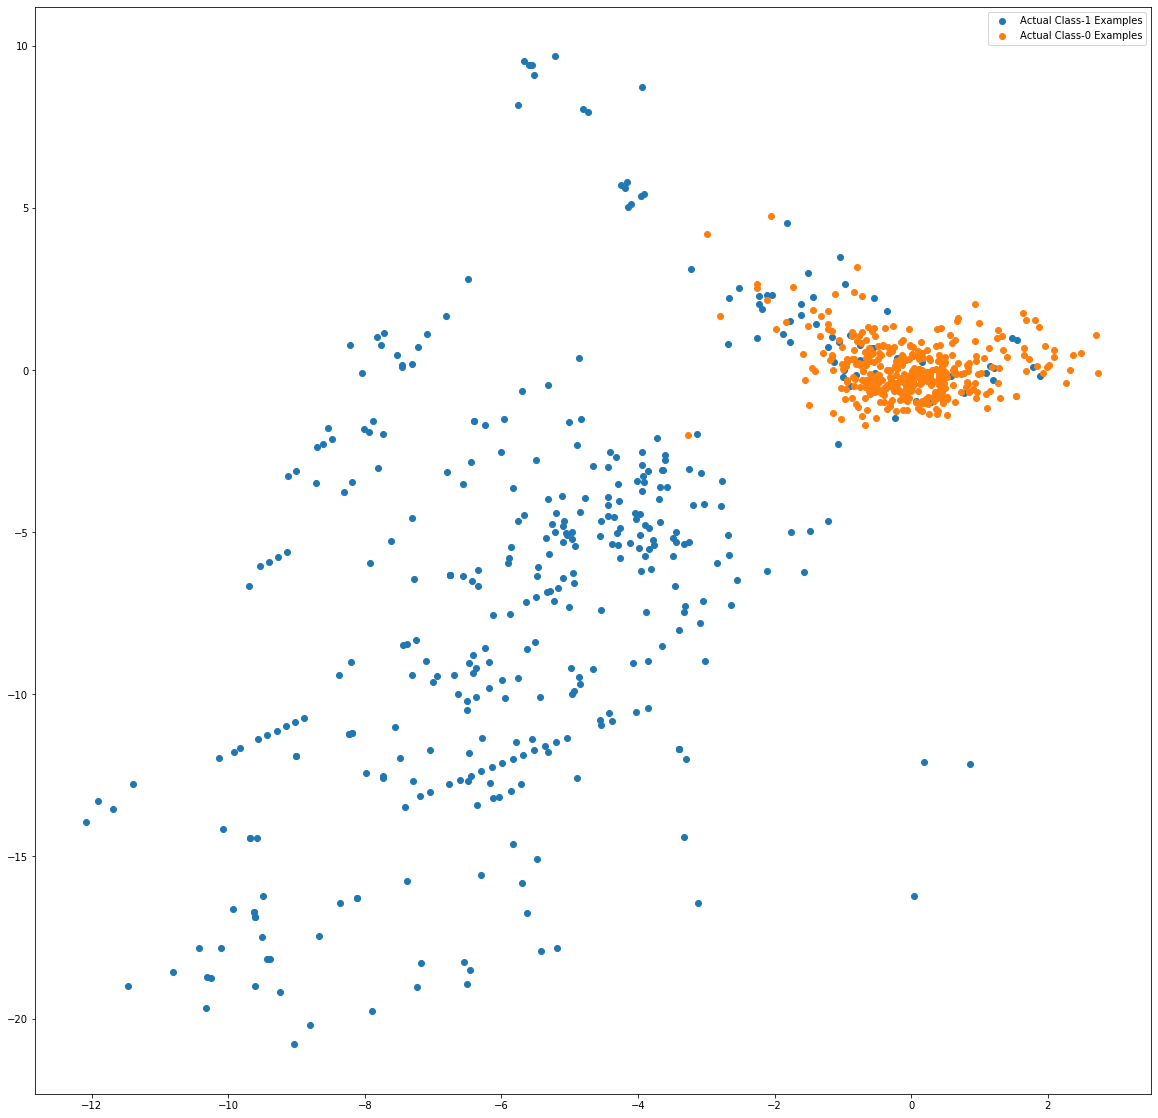

In [1007]:
# fit XGBoost model to random over-sampled dataset
xgb_opt2.fit(X_train_ros, y_train_ros)

var_imp = []
for i in xgb_opt2.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_opt2.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_opt2.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_opt2.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_opt2.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_opt2.feature_importances_)[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [1045]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [1047]:
print('Train auc =', metrics.roc_auc_score(y_test_cv,xgb_opt2.predict_proba(X_test_cv)[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv,xgb_opt2.predict_proba(X_test_cv)[:, 1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9900359238781092
0.26322472
